### Model Performance Comparison

To directly compare the three models (SVM, Logistic Regression, and XGBoost), 
the saved `.pkl` pipelines were reloaded and evaluated on the same test set. 
We computed Accuracy, Macro-F1, and Weighted-F1 scores for each model. 
The bar chart below provides a clear visual comparison, showing which model 
achieves the best balance between accuracy and class-wise performance.

                     Accuracy  Macro-F1
XGBoost                0.9442    0.9304
SVM                    0.9687    0.9606
Logistic Regression    0.9672    0.9587


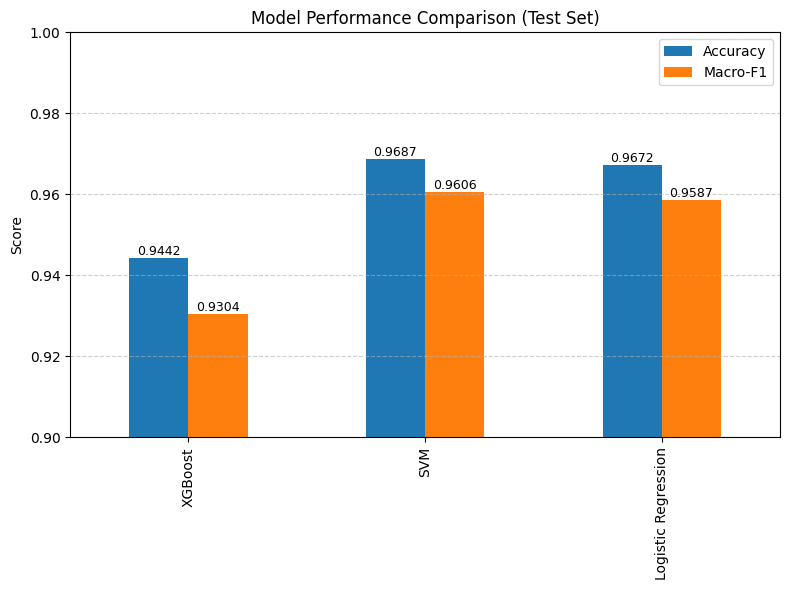

In [1]:
import numpy as np
import pandas as pd
import joblib
from scipy import sparse
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# ---- Paths ----
DATA_DIR = "/kaggle/input/data-preprocessing-assignment"
X_TEST = sparse.load_npz(f"{DATA_DIR}/X_test_tfidf.npz")
y_test = np.load(f"{DATA_DIR}/y_test.npy")

models = {
    "XGBoost": joblib.load("/kaggle/input/xgboost-assignment/xgb_best_model.pkl"),
    "SVM": joblib.load("/kaggle/input/svm-assignment/svm_best_model.pkl"),
    "Logistic Regression": joblib.load("/kaggle/input/logistic-regression-assignment/logreg_best_model.pkl"),
}

# ---- Evaluate ----
results = {}
for name, model in models.items():
    y_pred = model.predict(X_TEST)
    results[name] = {
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Macro-F1": round(f1_score(y_test, y_pred, average="macro"), 4),
    }

# ---- Table ----
results_df = pd.DataFrame(results).T
print(results_df)

# ---- Plot ----
ax = results_df.plot(kind="bar", figsize=(8,6))
ax.set_title("Model Performance Comparison (Test Set)")
ax.set_ylabel("Score")
ax.set_ylim(0.90, 1.00)
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Add exact values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="bottom", fontsize=9, rotation=0)

plt.tight_layout()
plt.show()